# Self Organizing Maps

In [1]:
import numpy as np

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# contour plots 
import matplotlib.cm as cm

# 3D plots
from mpl_toolkits.mplot3d.axes3d import Axes3D

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

In [2]:
def eucl(p1,p2): # square of the Euclidean distance
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2

Another very important application of unsupervised learning are the so-called **Kohonen nets** (Finnish neuroscientist Teuvo Kohonen, 1970'), i.e. **self-organizing mappings preserving topology**. Consider a mapping

$ N \to D = f (N) $,

where $ D $ is the set of input data and $ N $ is the discrete set of neurons. In general, the dimensions of these sets can be anything you like. The $ f $ mapping
has the following **topological** property: if two neurons $ n_1 $ and $ n_2 $ z are close to each other, then also $ d_1 = f (n_1) $ and $ d_2 = f (n_2) $ are close to each other. This allows for "transfering" of structures from the $ D $ data space to the $ N $ neuron space.

Such a mechanism takes place, for example, in the visual system, which will be discussed soon.

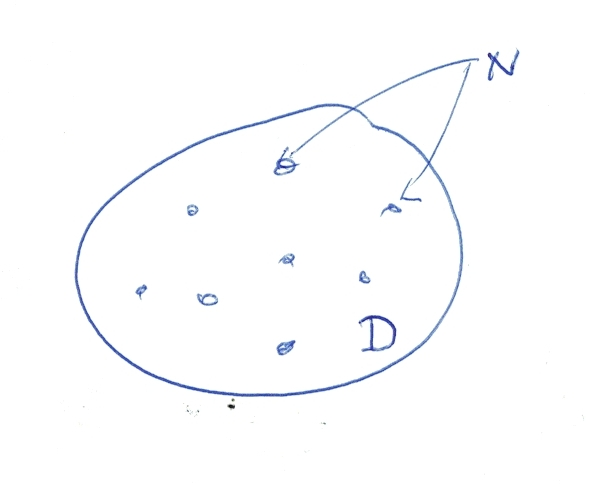

In [3]:
Image(filename="images/ND.jpg",width=400)

Kohonen's algorithm and "winner takes most" strategy

Let $ D $ be an $ n $ -dimensional data set and $ N $ a discrete set of neurons.
The neuron index, consisting of $ k $ natural numbers,
is denoted as $ \bar {i} = (i_1, i_2, ..., i_k) $ ($ k $ is therefore the discrete dimension of $ N $).

The situations for which $ n > k $, i.e. a **reduction of the number of dimensions** from the $ D $ data space to $ N $, are considered.


The total number of
neurons is denoted by $ m $.

We also define the neighbors proximity function in the set $ N $, depending on the neurons' relative position, $ \phi (\bar {i}, \bar {j}) $. This function must decrease with the distance between the indices. A typical choice of this **neighborhood function** is the Gaussian form:

$\phi(\bar{i}, \bar{j})=\exp\left [ -\frac{(i_1-j_1)^2+...+(i_k-j_k)^2}{2 \delta^2} \right ]$,

where $\delta$ is the **neighborhood radius**.

**Algorithm**

0. We initialize (for instance, randomly) the $ k $ -dimensional weights $ w_i $ for all $ m $ neurons. We set an initial neighborhood radius $ \delta $ and the learning rate $ \varepsilon $.

1. We choose (randomly) the $ x $ data point from the input space (possibly with an appropriate probability distribution).

2. We find the $ \bar {l} $ neuron for which the distance from $ x $ is the smallest.

3. The weights are updated according to the recipe

$w_{\bar{i}} \to w_{\bar{i}} + \varepsilon \phi(\bar{i}, \bar{l})(x - w_{\bar{i}})$,  $\;\;\; i = 1, . . . , m$.

4. Repeat from step 1 until we get a satisfactory result, **reducing** accordingly
the $ \varepsilon $ and $ \delta $ parameters. This shrinkage, and the way it is done, is important to the correct operation of the algorithm. The termination criterion is a limit on the number of iterations or the amount of the weight change. For example, if the weights fluctuate less than a certain small number, then we stop.

Note that updating in step 3 is a **"winner takes most"** strategy. It turns out that updating neighbors is crucial for preserving the topology - close neurons are likely to fire, too. The farther is the neuron $\bar i$ from the winner of $\bar l$, the less updated it is.

Figuratively speaking, the point $ x $ attracts the nearest neuron and (to a weaker extent) its neighbors. After several learning steps, individual neurons "specialize" (are close to) in a certain data area. It is the key feature that is responsible for the above-mentioned preservation of topology.

Let's see how the procedure works on a simple example:

## An example of mapping two-dimensional data in a one-dimensional network of neurons

Read one cell below

In [4]:
def point(): # point from [0,1]x[0,1]
    return np.array([np.random.random(),np.random.random()])

In [5]:
def point(): # point from a circle
    while True:
        x=2*np.random.random()
        y=np.random.random()
        if (x-0.5)**2+(y-0.5)**2 < 0.4**2 or (x-1.5)**2+(y-0.5)**2 < 0.4**2 :
            break
    return np.array([x,y])

In [6]:
point()

array([0.32775984, 0.84335562])

In [7]:
num=100 # number of neurons

In [8]:
def phi(i,k,d): # neighborhood function
    # i and k - neuron indices
    # d - characteristic neighborhood scale
    return np.exp(-(i-k)**2/(2*d**2))

In [9]:
np.round(phi(10,13,2),3)

0.325

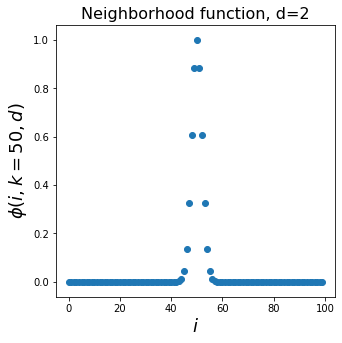

In [10]:
l=50
d=2

plt.figure(figsize=(5,5))
plt.title("Neighborhood function, d="+str(d),fontsize=16) 

ind=[i for i in range(num)]
ph= [phi(i,l,d) for i in range(num)]

plt.scatter(ind,ph)

plt.xlabel('$i$',fontsize=18)
plt.ylabel('$\phi(i,k=$'+str(l)+'$,d)$',fontsize=18);    

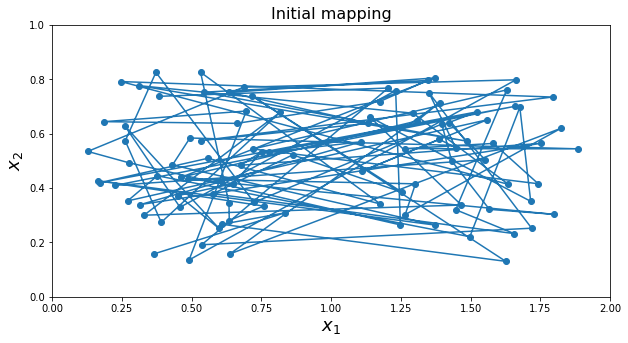

In [12]:
W=np.array([point() for _ in range(num)]) # random initialization of weights

plt.figure(figsize=(10,5))
plt.title("Initial mapping",fontsize=16) 
plt.xlim(0,2)
plt.ylim(0,1)

plt.scatter(W[:,0],W[:,1])
plt.plot(W[:,0],W[:,1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);    

In [13]:
print(W[99],W[98])

[0.38318433 0.73753057] [1.20496949 0.76806849]


The line connects the subsequent neurons ... They are chaotically scattered around the region.

In [14]:
eps=.5   # initial learning speed (0.5)
de = 10  # initial neighborhood distance (10)

In [ ]:
# Kohonen's algorithm
for _ in range(100): # rounds
    eps=eps*.98 # learning speed drops
    de=de*.95   # and so does the neighborhood distance
    for _ in range(100): # loop over points
        p=point()        # random point
        dist=[eucl(p,W[k]) for k in range(num)] 
         # array of Euclidean disances from the neuron locations
#        print(np.round(dist,3))
        ind_min = np.argmin(dist) # index of the winner
#        print(ind_min)
        for k in range(num): 
            W[k]+=eps*phi(ind_min,k,de)*(p-W[k]) 
             # update of the neuron locations

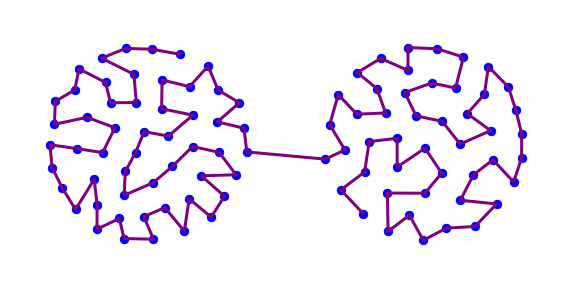

In [35]:
fk=plt.figure(figsize=(10,5))
#plt.title("Kohonen network",fontsize=16) 
plt.xlim(0,2)
plt.ylim(0,1)

plt.axis('off')
 
plt.scatter(W[:,0],W[:,1],c='blue',s=70)
plt.plot(W[:,0],W[:,1],c='purple',linewidth=3)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)

plt.savefig('koh.png')

The above visualization draws the neurons in the input space that serves as the "background" here.

We can also look at the mapping from the "point of view" of the neurons:

In [15]:
for i in range(num):
    print(" ",i,np.round(W[i,0],3),np.round(W[i,1],3),end=' ')
    if i>0:
        print(np.round(np.sqrt(eucl(W[i],W[i-1])),3))
    else:
        print()
        
# N -> D  - our function      
        
# i   x   y    distance from neuron (i-1)

  0 0.162 0.603 
  1 0.178 0.661 0.06
  2 0.223 0.697 0.057
  3 0.229 0.758 0.062
  4 0.288 0.76 0.059
  5 0.309 0.823 0.066
  6 0.325 0.714 0.11
  7 0.302 0.653 0.065
  8 0.396 0.672 0.096
  9 0.427 0.739 0.074
  10 0.367 0.774 0.07
  11 0.372 0.841 0.066
  12 0.435 0.864 0.067
  13 0.452 0.797 0.069
  14 0.508 0.862 0.086
  15 0.557 0.845 0.052
  16 0.569 0.768 0.077
  17 0.511 0.764 0.058
  18 0.485 0.706 0.064
  19 0.542 0.683 0.061
  20 0.601 0.679 0.059
  21 0.671 0.647 0.077
  22 0.643 0.723 0.081
  23 0.646 0.775 0.053
  24 0.644 0.834 0.059
  25 0.719 0.799 0.083
  26 0.758 0.748 0.064
  27 0.737 0.681 0.071
  28 0.809 0.699 0.074
  29 0.817 0.632 0.068
  30 0.868 0.576 0.076
  31 0.821 0.564 0.049
  32 0.777 0.532 0.054
  33 0.708 0.538 0.069
  34 0.737 0.601 0.07
  35 0.653 0.598 0.084
  36 0.621 0.533 0.073
  37 0.672 0.483 0.071
  38 0.608 0.448 0.072
  39 0.662 0.419 0.061
  40 0.706 0.364 0.071
  41 0.742 0.419 0.066
  42 0.751 0.48 0.062
  43 0.81 0.46 0.062
  44 0.852 

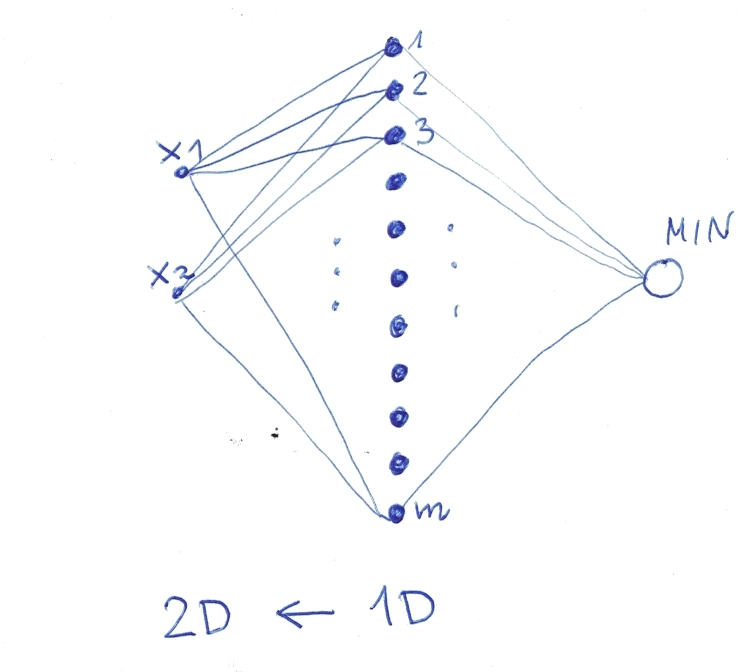

In [16]:
Image(filename="images/Koh21.jpg",width=400)

Relevant remarks:

- **Dimensional reduction**! We obtain a situation in which the data space with the dimension $ n $ (here $ n = 2 $) is "sampled" by a discrete set of neurons with a $k$-dimensional index (here $ k = 1 <n $).

- The effect of the algorithm is the creation of a network in which a given neuron "focuses" on data from its vicinity. In a general case where the data are non-uniformly distributed, the neurons would fill the area with more data more densely, because the data points "attract" the neurons.

- The lines in the above figure are "to guide the eye" to the next neuron, $ 1,2, ..., m $, they do not mean any connection (!)

- We see a similar behavior to the construction of the so-called Peano curve in mathematics, which fills an area with a line.

- The distances between successive neurons are similar, see the table above.

- There cannot be line intersections (!), as this would be against the topological condition. The close points in the data space would then correspond to distant neurons.

- The policy of choosing $ \delta $ and $ \varepsilon $ parameters and reducing them in the following rounds based on experience and non-trivial.


**The fact that you can achieve topological behavior with as simple a recipe as the winner-take-the-majority strategy in unsupervised learning is fascinating.**

Run the above with different parameters and for a different data area

Approximate representation of two-dimensional data using a one-dimensional line of neurons.

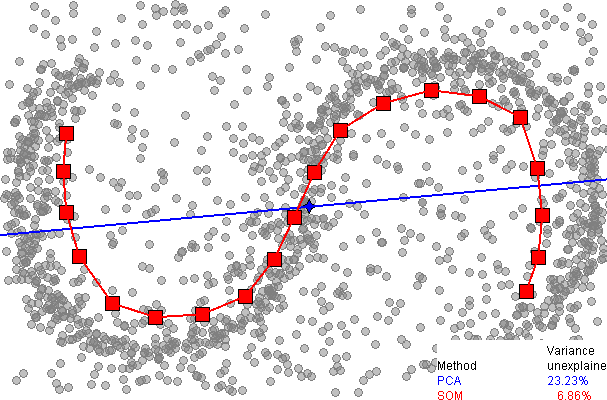

In [17]:
Image(filename="images/SOMsPCA.png",width=320)

Basic SOM functionality:

1. Learning (in an unsupervised way)
2. Using as a classifier

## Color map

Now an example of mapping a two-dimensional neuron array into 3-dimensional data

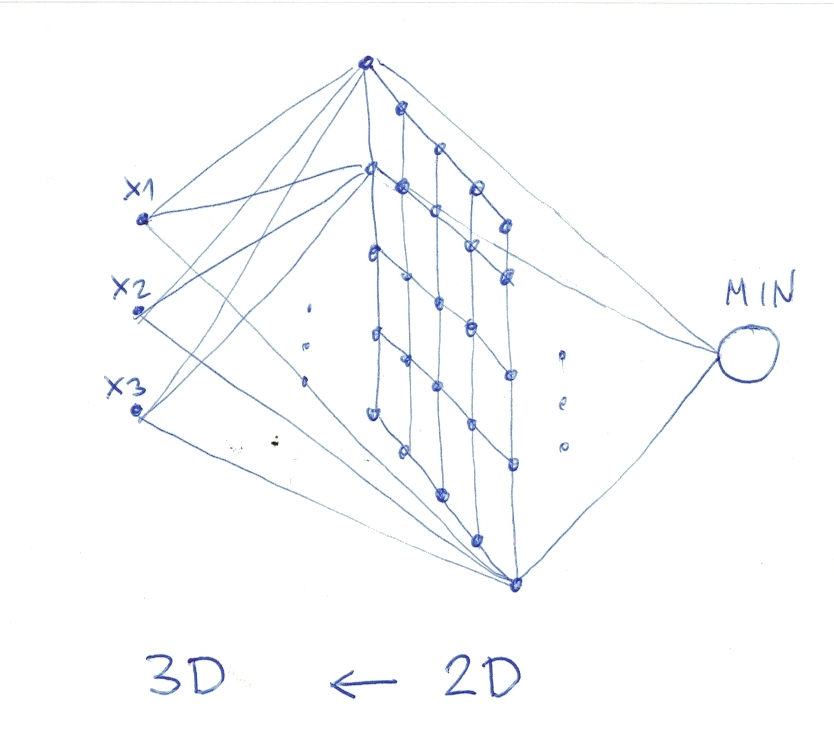

In [18]:
Image(filename="images/Koh32.jpg",width=430)

In [19]:
def dist3(p1,p2): 
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

In [20]:
def phi2(ix,iy,kx,ky,d): # Gaussian in 2D
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2)) 

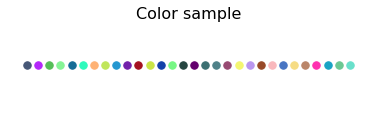

In [21]:
ns=30  # run also for 3, 4, 5, 30, 500
# random sample of ns colors

samp=[[np.random.random(),np.random.random(),np.random.random()] for _ in range(ns)]

#samp=[[np.random.random(),0,0] for _ in range(ns)] # one color

# RGB
# samp=[[1,0,0],[0,1,0],[0,0,1]]

pls=plt.figure(figsize=(6.5,1.5))
plt.title("Color sample",fontsize=16) 

plt.axis('off')

for i in range(ns):
    plt.scatter(i/ns,0,color=samp[i], s=50000/ns**2); 

In [22]:
np.round(samp,3)

array([[0.276, 0.341, 0.463],
       [0.705, 0.157, 0.98 ],
       [0.332, 0.744, 0.343],
       [0.526, 0.958, 0.589],
       [0.084, 0.424, 0.59 ],
       [0.179, 0.982, 0.739],
       [0.996, 0.699, 0.457],
       [0.753, 0.901, 0.359],
       [0.146, 0.591, 0.815],
       [0.446, 0.13 , 0.667],
       [0.645, 0.069, 0.128],
       [0.792, 0.894, 0.28 ],
       [0.075, 0.254, 0.662],
       [0.463, 0.969, 0.516],
       [0.15 , 0.276, 0.256],
       [0.387, 0.002, 0.432],
       [0.235, 0.438, 0.448],
       [0.309, 0.506, 0.535],
       [0.593, 0.29 , 0.446],
       [0.958, 0.964, 0.442],
       [0.731, 0.593, 0.942],
       [0.597, 0.285, 0.156],
       [0.978, 0.722, 0.741],
       [0.282, 0.457, 0.764],
       [0.965, 0.864, 0.52 ],
       [0.729, 0.522, 0.412],
       [0.996, 0.194, 0.69 ],
       [0.099, 0.641, 0.768],
       [0.419, 0.783, 0.577],
       [0.41 , 0.878, 0.796]])

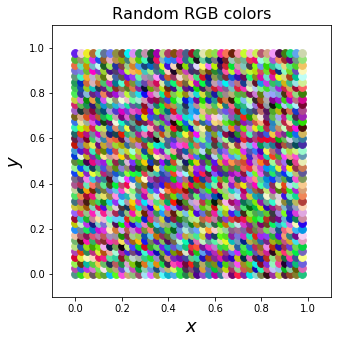

In [23]:
size=40  # neuron array of size x size (40 x 40)

tab=np.zeros((size,size,3)) 

for i in range(size):      
    for j in range(size):  
        for k in range(3): # 3 RGB components
#        for k in range(1): # color intensity
            tab[i][j][k]=np.random.random() # random initialization

plt.figure(figsize=(5,5))
plt.title("Random RGB colors",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for i in range(size):
    for j in range(size):
        plt.scatter(i/size,j/size,color=tab[i][j], s=60) 
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [24]:
eps=.5   
de = 10  # (25 for small samples, 1 for bigger)
rep= 1   # repeats without changing eps and de (4,1)

Do step by step

0.18301617063661463 0.16870319358849592


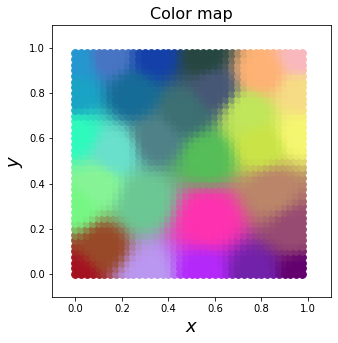

In [25]:
for _ in range(100):  # rounds
    eps=eps*.99      
    de=de*.96        
    for _ in range(rep):    
        for s in range(ns): # loop over the data sample       
#            p=[np.random.random(),np.random.random(),np.random.random()] # random RGB
            p=samp[s] # poin of the sample
            dist=[[dist3(p,tab[i][j]) for j in range(size)] for i in range(size)] 
                # distance in color to all neurons
            ind_min = np.argmin(dist) # winner index
            ind_x=ind_min//size       # a trick to get a 2-dim index
            ind_y=ind_min%size
#            print(dist)
#            print(ind_x, ind_y, dist[ind_x][ind_y], tab[ind_x][ind_y])

            for j in range(size): 
                for i in range(size):
                    tab[i][j]+=eps*phi2(ind_x,ind_y,i,j,de)*(p-tab[i][j]) 
                      # update
                        
                        
fig0=plt.figure(figsize=(5,5))
plt.title("Color map",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for i in range(size):
    for j in range(size):
        plt.scatter(i/size,j/size,color=tab[i][j], s=60)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

print(eps,de) 

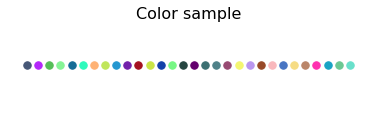

In [26]:
pls

Comments

- The algorithm divides the data into clusters in the sense that close data points are mapped to nearby neurons.

- The final result is not unequivocal, i.e. running the algorithm with a different initialization of the weights gives a different division, equally "good".

- The areas for the individual colors of the sample have a comparable area. Generally, the area is proportional to the sample size.

- To get sharper boundaries between regions, de has to shrink faster than eps. Then, in the final stage of learning, the neural adaptation process takes place for small neighborhood distances.

- It makes no sense to consider the case when the dimension of the neural network is greater than the dimension of the data.


First show the U matrix below. Then go back and run for different de values and for different sample sizes, and also for an infinite sample and for a single color.

## Unified distance matrix

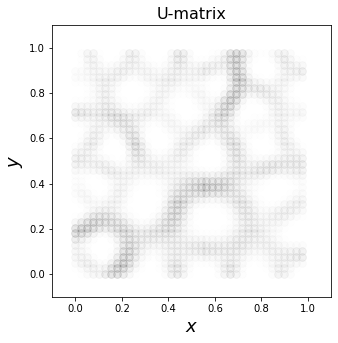

In [27]:
siz=size-1 

ta=np.zeros((siz,siz))

sc=0.25

for i in range(siz):
    for j in range(siz):
        ta[i][j]=sc*np.sqrt(dist3(tab[i][j],tab[i][j+1])+
                            dist3(tab[i][j+1],tab[i+1][j+1])+
                            dist3(tab[i+1][j+1],tab[i+1][j])+
                            dist3(tab[i+1][j],tab[i][j]))
        # sum of squares of distances around the plaquette
plt.figure(figsize=(5,5))
plt.title("U-matrix",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for i in range(siz):
    for j in range(siz):
        plt.scatter(i/siz,j/siz,color=[0,0,0,ta[i][j]], s=60) 

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

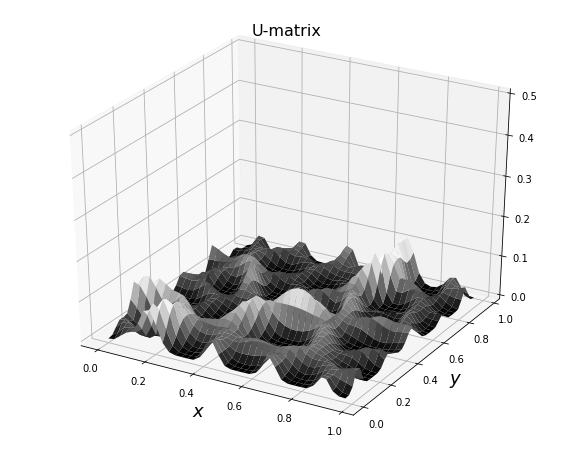

In [28]:
fig = plt.figure(figsize=(10,8))
axes1 = fig.add_subplot(111, projection="3d")
ax = fig.gca(projection='3d')

xx_1 = np.arange(0, 1, 1./siz)
xx_2 = np.arange(0, 1, 1./siz)

x_1, x_2 = np.meshgrid(xx_1, xx_2)

Z=np.array([[ta[i][j] for i in range(siz)] for j in range(siz)])

ax.set_zlim(0,.5)

ax.plot_surface(x_1,x_2, Z, cmap=cm.gray)

# plt.axis('off')
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

plt.title("U-matrix",fontsize=16);


Distance map for a given (new) data point (i.e. using a classifier)

In [29]:
nd=[np.random.random(),np.random.random(),np.random.random()]

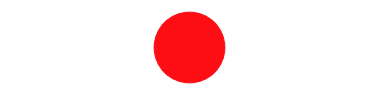

In [30]:
plt.figure(figsize=(6.5,1.5))

plt.axis('off')
plt.scatter(0,0,color=nd, s=5000); 

Classification of the point according to the previously obtained map

Closest neuron coordinates: ( 0.0 0.0 )
Distance:  0.35


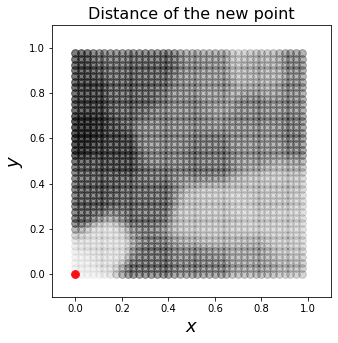

In [31]:
tad=np.zeros((size,size))

for i in range(size):
    for j in range(size):
        tad[i][j]=dist3(nd,tab[i][j])
        

ind_m = np.argmin(tad) # winner
in_x=ind_m//size      
in_y=ind_m%size 

da=np.sqrt(tad[in_x][in_y])

print("Closest neuron coordinates: (",in_x/size,in_y/size,")")
print("Distance: ",np.round(da,3))

plt.figure(figsize=(5,5))
plt.title("Distance of the new point",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

for i in range(size):
    for j in range(size):
        plt.scatter(i/size,j/size,color=[0,0,0,tad[i][j]/3], s=60) 
        
plt.scatter(in_x/size,in_y/size,color=nd, s=60) 

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

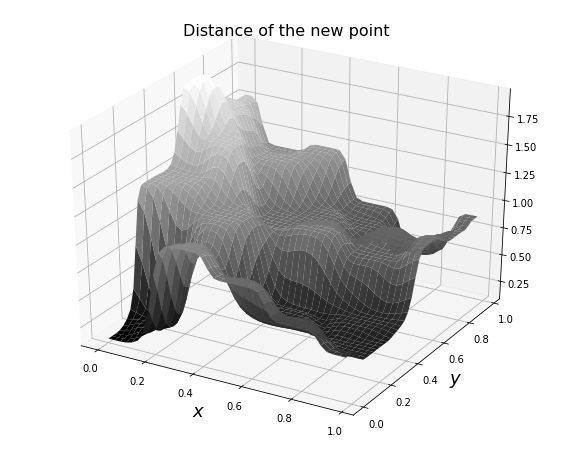

In [32]:
fig = plt.figure(figsize=(10,8))
axes1 = fig.add_subplot(111, projection="3d")
ax = fig.gca(projection='3d')

xx_1 = np.arange(0, 1, 1./size)
xx_2 = np.arange(0, 1, 1./size)

x_1, x_2 = np.meshgrid(xx_1, xx_2)

Z=np.array([[tad[i][j] for i in range(size)] for j in range(size)])

# ax.set_zlim(0,.5)

ax.plot_surface(x_1,x_2, Z, cmap=cm.gray)

# plt.axis('off')
plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

plt.title("Distance of the new point",fontsize=16);


Comment

We have a classifier that assigns a position in a space with a reduced number of dimensions.

## Mapping colors on a line

Reduction of three dimensions into one

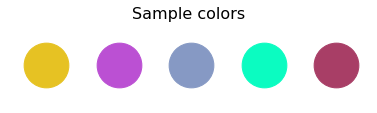

In [33]:
ns=5  # do for 3, 4, 5
# random sample
samp=[[np.random.random(),np.random.random(),np.random.random()] for _ in range(ns)]

# RGB
# samp=[[1,0,0],[0,1,0],[0,0,1]]

fig1=plt.figure(figsize=(6.5,1.5))
plt.title("Sample colors",fontsize=16) 

plt.axis('off')

for i in range(ns):
    plt.scatter(i/ns,0,color=samp[i], s=50000/ns**2);

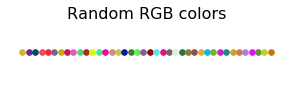

In [34]:
si=40  # 1D array of si neurons

tab2=np.zeros((si,3))

for i in range(size):      
    for k in range(3): # 3 RGB components
        tab2[i][k]=np.random.random() # random initialization

plt.figure(figsize=(5,1))
plt.title("Random RGB colors",fontsize=16) 
plt.axis('off')

for i in range(si):
    plt.scatter(i/si,0,color=tab2[i], s=50000/si**2); 

In [35]:
eps=.5    
de = 20   
rep= 1    

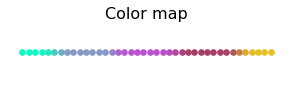

In [36]:
for _ in range(100): 
    eps=eps*.99      
    de=de*.96        
    for _ in range(rep):    
        for s in range(ns):       
#            p=[np.random.random(),np.random.random(),np.random.random()] # random RGB
            p=samp[s] # punkt próbki
            dist=[dist3(p,tab2[i]) for i in range(si)] 
            ind_min = np.argmin(dist) 
         
            for i in range(si):
                tab2[i]+=eps*phi(ind_min,i,de)*(p-tab2[i]) 

fig2=plt.figure(figsize=(5,1))
plt.title("Color map",fontsize=16) 
plt.axis('off')

for i in range(si):
    plt.scatter(i/si,0,color=tab2[i], s=50000/si**2); 

Smooth transition between colors.

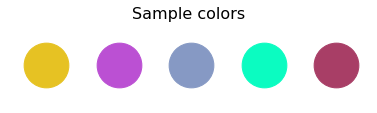

In [37]:
fig1

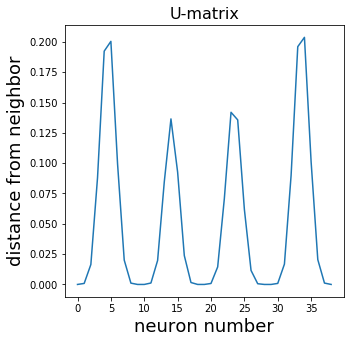

In [38]:
si2=si-1

xr=np.array([i for i in range(si2)])

ta2=np.zeros(si2)

for i in range(si2):
    ta2[i]=np.sqrt(dist3(tab2[i],tab2[i+1]))
        
plt.figure(figsize=(5,5))
plt.title("U-matrix",fontsize=16) 

plt.plot(xr,ta2) 

plt.xlabel('neuron number',fontsize=18)
plt.ylabel('distance from neighbor',fontsize=18);

The minima correspond to the individual colors of the sample. The height of the separating peaks shows how much the colors differ.

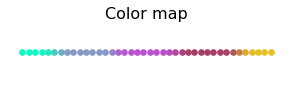

In [39]:
fig2

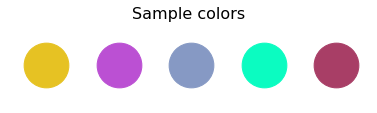

In [40]:
fig1

The most similar colors are not necessarily adjacent. The behavior depends on the value of the de parameter.

### Wikipedia articles' similarity

Reduction from very many parameters into 2. U-matrix.

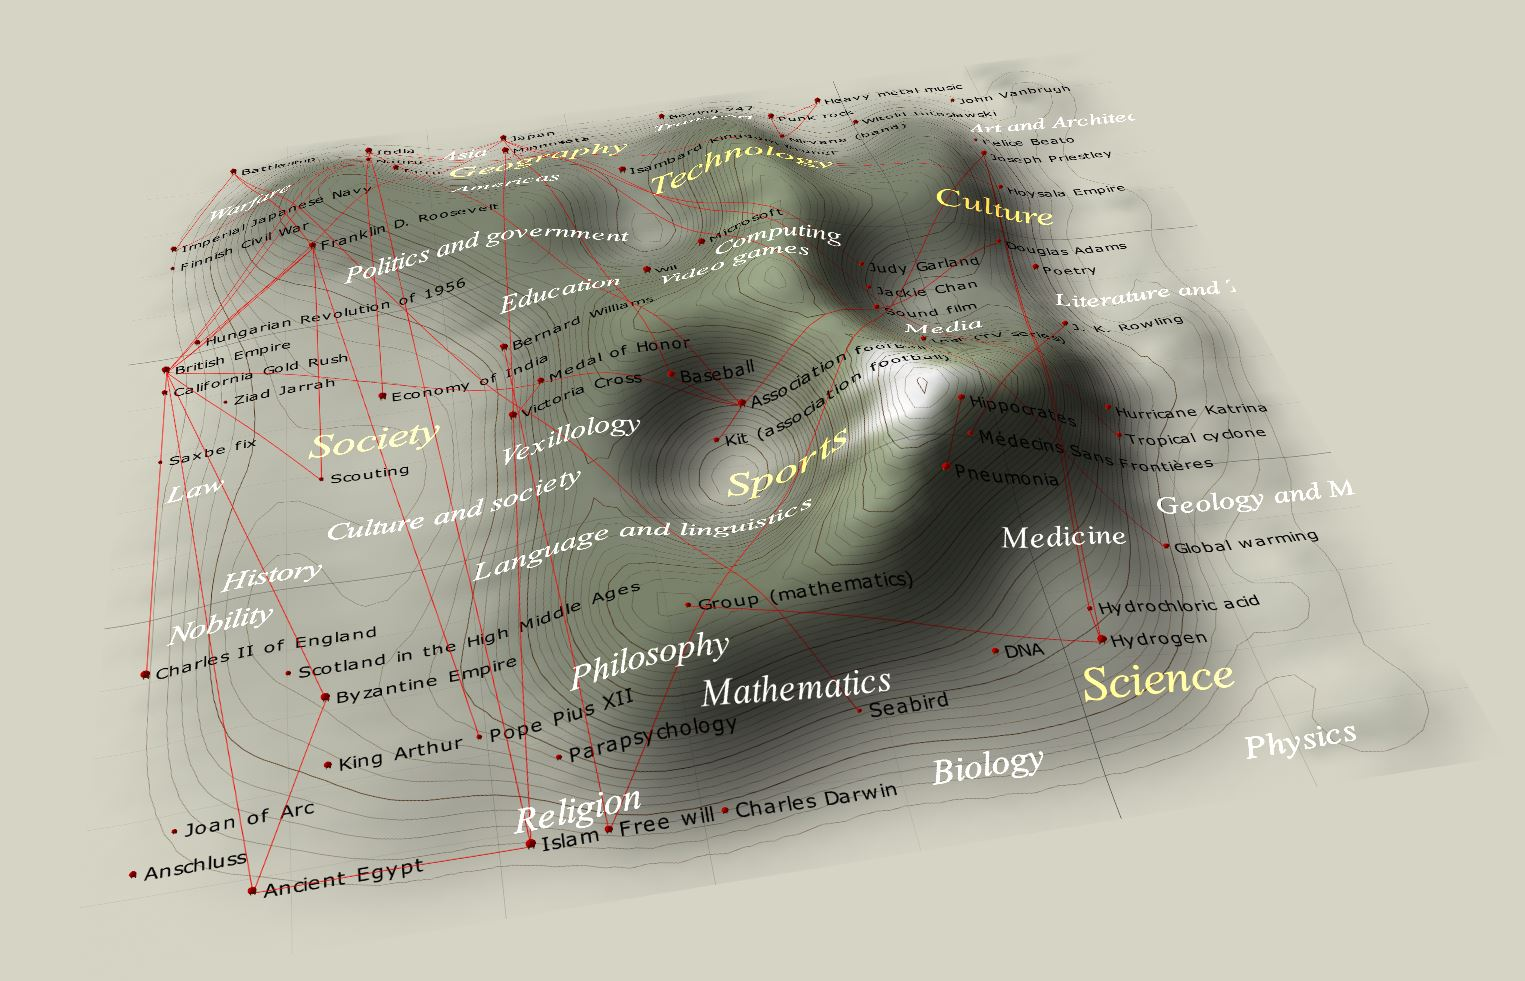

In [41]:
Image(filename="images/Self_oraganizing_map_cartography.jpg",width=620)

[Wikipedia] Cartographical representation of a self-organizing map (U-Matrix) based on Wikipedia featured article data (word frequency). Distance is inversely proportional to similarity. The "mountains" are edges between clusters. The red lines are links between articles.

## Mapping two-dimensional data into a two-dimensional network

Raúl Rojas, Neural Networks, a Systematic Introduction.

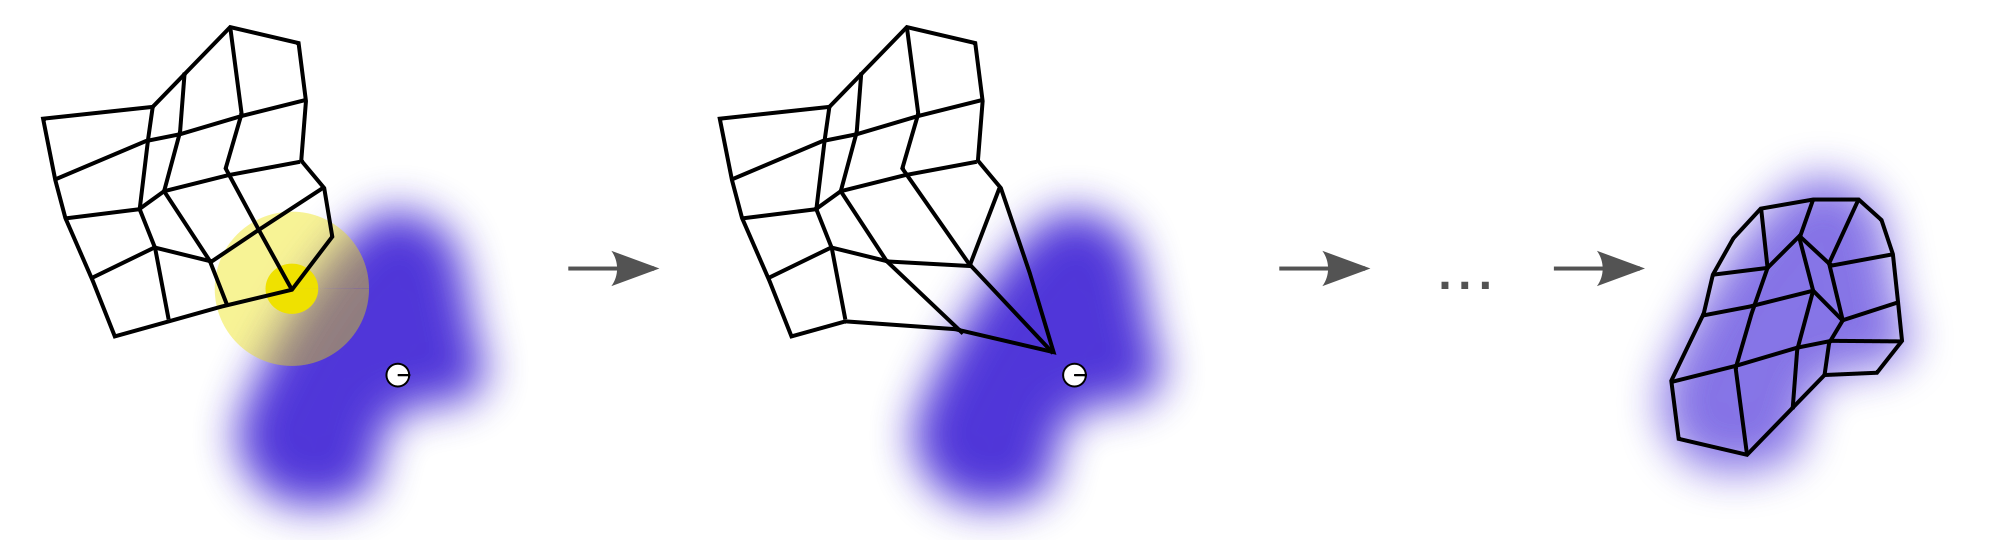

In [42]:
Image(filename="images/koh3.png",width=500)

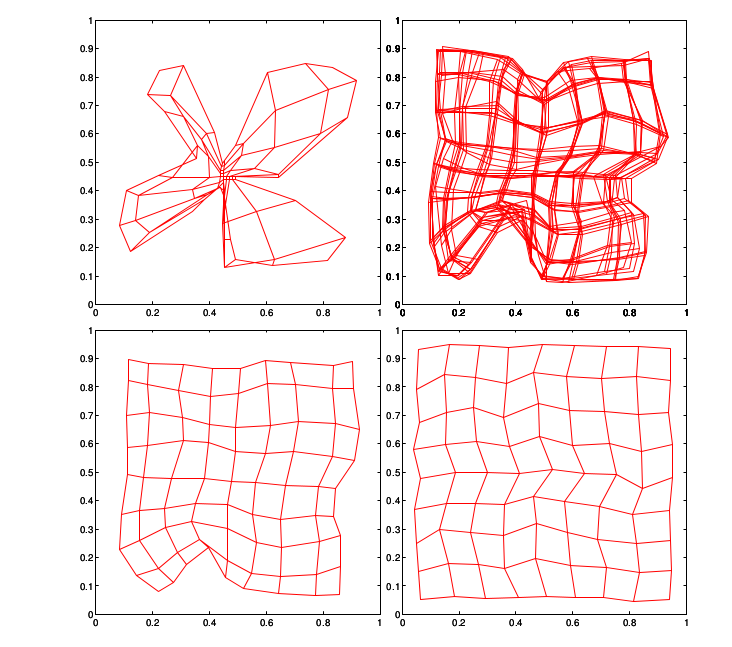

In [43]:
Image(filename="images/koh2.png",width=500)

Mapping the retina into the visual area of the cerebral cortex

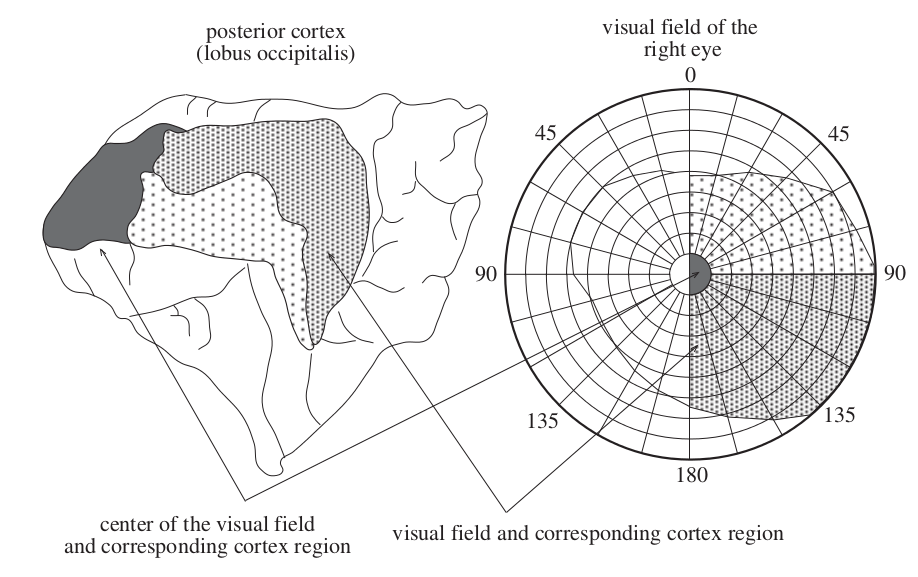

In [44]:
Image(filename="images/map_vis.png",width=650)

Topology of the vision

In this case, preserving the topology means that, for example, a retinal circle is mapped into a loop in the cerebral cortex. 

A digression about the imperfections of the image and "cognitive correction".

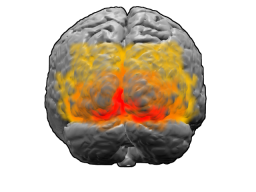

In [45]:
Image(filename="images/Brodmann.png",width=320)

Look at

HCP - Human Connectome Project http://www.humanconnectomeproject.org/

Homework:

Construct a Kohonen mapping form a 2D shape (square, cicle, 2 disjoint squares) on a 2D grid of neurons. 